In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
index, x1, y1, Mean, Mean_uncer, sigma,	sigma_uncer, A, A_uncer = np.loadtxt("background_data_final.csv", delimiter=',',skiprows=1,unpack=True)

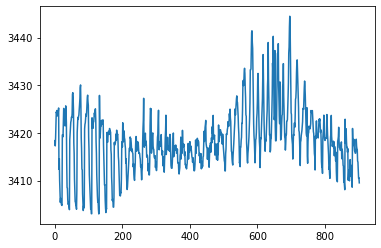

In [3]:
plt.plot(Mean)

In [5]:

import csv
#index_cluster = []
number_cluster = []
pxl_values_str = []
tot_brightness = []
brightest_pixel_val = []
brightest_pixel_coord = []
magnitude = []

with open('Cluster_200800_200200.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(reader, None)
    for row in reader:
      number_cluster.append(row[1])
      pxl_values_str.append(row[2])
      tot_brightness.append(float(row[3]))
      brightest_pixel_val.append(float(row[4]))
      brightest_pixel_coord.append(row[5])
      magnitude.append(float(row[6]))


print(pxl_values_str[0])
print(type(pxl_values_str[0]))

#datareader = csv.reader("Cluster_200800_200200.csv", delimiter=',', quotechar='"')

[3484, 3482, 3489]
<class 'str'>


## getting a list of list

In [6]:
pxl_value_array = []
for string in pxl_values_str:
  string = string.replace('[','')
  string = string.replace(']','')
  array = string.split(",")

  #print(array)
  pxl_value_array.append(array)

print(pxl_value_array[0][0])

3484


In [7]:
def string_to_array(input):
  output = []
  for string in input:
    string = string.replace('[','')
    string = string.replace(']','')
    array = string.split(",")

    
    output.append(array)
  return output

In [21]:
brightest_pixel_coord_array = string_to_array(brightest_pixel_coord)
print(brightest_pixel_coord_array[0])

['126', ' 3588']


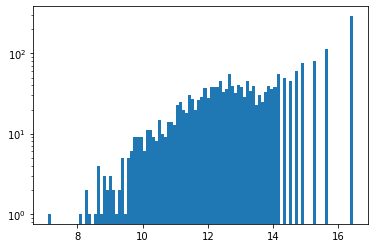

In [10]:
plt.hist(magnitude,bins=100)
plt.yscale("log")

In [27]:
import math

def get_center_rounded_down(coordinates):
  x_coord = math.floor(float(coordinates[0]) / 100) * 100
  y_coord = math.floor(float(coordinates[1]) / 100) * 100
  
  return x_coord, y_coord 

print(get_center_rounded_down(brightest_pixel_coord_array[1]))

(0, 3500)


In [74]:
  
def get_background_index(x, y, x1_array, y1_array): #x1 and y1 are arrays  
  x_test = np.where(x1_array == x)
  y_test = np.where(y1_array == y)
  return np.intersect1d(x_test, y_test)

print(get_background_index(200.0, 3500.0, x1, y1))

[684]


In [12]:
print(len(pxl_value_array))
print(len(brightest_pixel_coord))

2046
2046


In [75]:
def subtract_background(array_of_pixels, background_count):
  true_total_value = 0

  for pixel_value in array_of_pixels:
    true_total_value += float(pixel_value) - background_count
  
  return true_total_value


In [86]:
#for i in range(len(pxl_value_array)):
true_total_value_array = []
true_magnitude = [] #ask how to calculate magnitude!

for i in range(len(pxl_value_array)):
  #getting coords of center pixel and rounding it down
  x_coord, y_coord = get_center_rounded_down(brightest_pixel_coord_array[i])
  #print(x_coord,y_coord)

  #checking if coords lie within cropped image
  if x_coord >= 200 and x_coord <= 2300 and y_coord >= 200 and y_coord <= 4400:
    background_index = get_background_index(x_coord, y_coord, x1, y1) #getting index of the background value
    if len(background_index) != 0:
      background_count_ave = Mean[background_index[0]]
      true_total_value = subtract_background(array_of_pixels = pxl_value_array[i], background_count = background_count_ave)
      true_total_value_array.append(true_total_value)
    



In [85]:
#print(true_total_value_array)

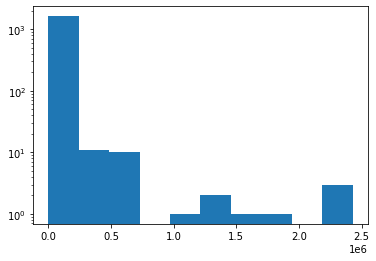

In [87]:
plt.hist(true_total_value_array)
plt.yscale('log')